In [ ]:
!pip install opencv-python

In [58]:
import tensorflow as tf
from tensorflow.keras import models, layers

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL      # image library


## Data loading
___________________________________________________

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# untar is to unzip the file

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib            # create a windows path object
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

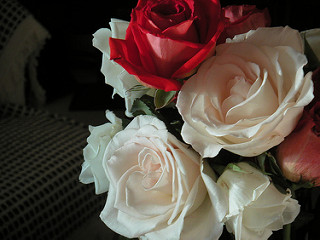

In [8]:
PIL.Image.open(str(roses[1]))

In [9]:
tulips  = list(data_dir.glob('tulips/*'))

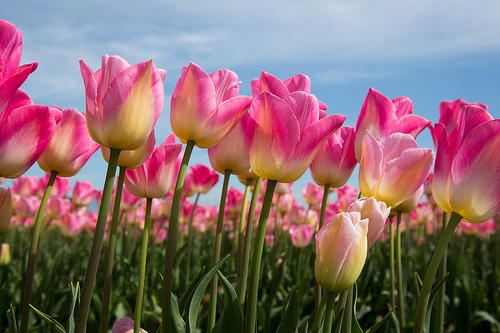

In [10]:
PIL.Image.open(str(tulips[3]))

In [11]:
flowers_image_dict = {
    "roses": list(data_dir.glob('roses/*')),
    "daisy": list(data_dir.glob('daisy/*')),
    "dandelion" : list(data_dir.glob('dandelion/*')),
    "sunflowers" : list(data_dir.glob('sunflowers/*')),
    "tulips" : list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_image_dict["sunflowers"]

[WindowsPath('datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552036_67d33d5bd8_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386522775_4f8c616999_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386525005_fd0b7d6c55_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386525695_2c38fea555_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386540106_1431e73086_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386540696_0a95ee53a8_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386702973_e74a34c806_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1043442695_4556c4c13d_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1044296388_912143e1d4.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1

In [13]:
flowers_label_dict = {
    "roses": 0,
    "daisy": 1,
    "dandelion" : 2,
    "sunflowers" : 3,
    "tulips" : 4,
}

In [14]:
# read the image file to numpy array
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [40]:
x, y = [], []
for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        x.append(cv2.resize(img,(180,180)))
        y.append(flowers_label_dict[flower_name])
        
    

In [41]:
y[:6]

[0, 0, 0, 0, 0, 0]

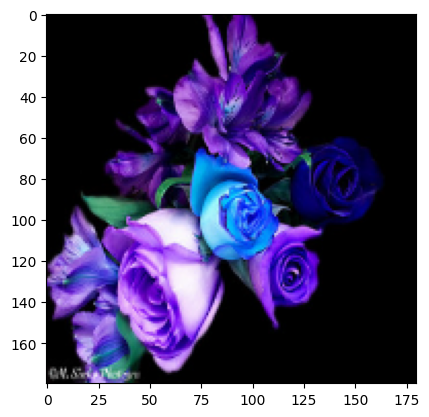

In [42]:
plt.imshow(x[6])

In [43]:
x = np.array(x)
y = np.array(y)
y[:6]

array([0, 0, 0, 0, 0, 0])

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2 , random_state = 0)

In [47]:
x_train.shape, x_test.shape,y_train.shape

((2936, 180, 180, 3), (734, 180, 180, 3), (2936,))

In [48]:
x_train_scaled = x_train/255
x_test_scaled  = x_test/255

In [55]:

num_classes  =5 
model = models.Sequential([
    layers.Conv2D(16, 3 , activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3 , activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3 , activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes),
])

model.compile( optimizer = "adam", 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics = ['accuracy'])
model.fit(x_train_scaled,y_train , epochs = 3)

Epoch 1/3
92/92 [==============================] - 47s 498ms/step - loss: 1.2212 - accuracy: 0.4925
Epoch 2/3
92/92 [==============================] - 49s 531ms/step - loss: 0.9172 - accuracy: 0.6468
Epoch 3/3
92/92 [==============================] - 58s 626ms/step - loss: 0.7226 - accuracy: 0.7309


In [56]:
model.evaluate(x_test_scaled, y_test)

23/23 [==============================] - 3s 128ms/step - loss: 0.9783 - accuracy: 0.6199


[0.978308916091919, 0.6198909878730774]

## Data augmentation
_____________________________________________________________

In [81]:
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomRotation(0.5),
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180,3)),
])

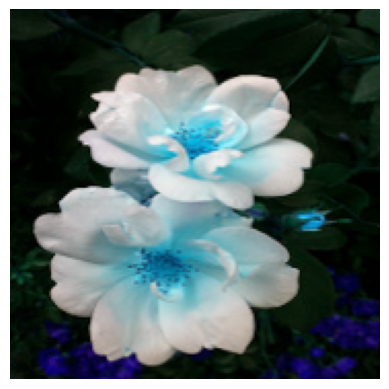

In [82]:
plt.axis('off')
plt.imshow(x[0])

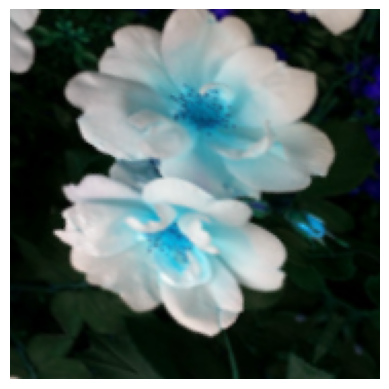

In [85]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

## Model with data augmentation
--------------------------

In [86]:
num_classes  =5 
model1 = models.Sequential([
    data_augmentation,
    layers.Conv2D(16, 3 , activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3 , activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3 , activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes),
])

model1.compile( optimizer = "adam", 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics = ['accuracy'])
model1.fit(x_train_scaled,y_train , epochs = 10)

Epoch 1/10
92/92 [==============================] - 57s 536ms/step - loss: 1.3083 - accuracy: 0.4322
Epoch 2/10
92/92 [==============================] - 50s 542ms/step - loss: 1.0905 - accuracy: 0.5596
Epoch 3/10
92/92 [==============================] - 51s 549ms/step - loss: 1.0265 - accuracy: 0.5869
Epoch 4/10
92/92 [==============================] - 51s 558ms/step - loss: 0.9385 - accuracy: 0.6362
Epoch 5/10
92/92 [==============================] - 54s 583ms/step - loss: 0.9055 - accuracy: 0.6454
Epoch 6/10
92/92 [==============================] - 54s 583ms/step - loss: 0.8764 - accuracy: 0.6560
Epoch 7/10
92/92 [==============================] - 57s 617ms/step - loss: 0.8563 - accuracy: 0.6727
Epoch 8/10
92/92 [==============================] - 56s 604ms/step - loss: 0.8169 - accuracy: 0.6822
Epoch 9/10
92/92 [==============================] - 61s 664ms/step - loss: 0.8140 - accuracy: 0.6860
Epoch 10/10
92/92 [==============================] - 60s 653ms/step - loss: 0.7757 - accura

In [87]:
model1.evaluate(x_test_scaled, y_test)

23/23 [==============================] - 2s 92ms/step - loss: 0.8950 - accuracy: 0.6512


[0.8950394988059998, 0.6512261629104614]